In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
import nltk
import re 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stock_data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/stock_data_nlp.csv')
stock_data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


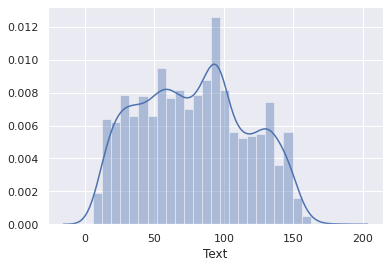

In [ ]:
## Lenght of the Text using KDEplot
lenght = stock_data["Text"].str.len()
sns.distplot(lenght)
plt.show()

# Example of stopwords

In [ ]:
## Checking for stopwords
from nltk.corpus import stopwords
stopwordSet = set(stopwords.words("english"))
stopwordSet

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# Processing

In [ ]:
## NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()

In [ ]:
print(ps.stem('rocks'))
print(ps.stem('nonwords'))

rock
nonword


In [ ]:
print(lemma.lemmatize('rocks'))
print(lemma.lemmatize('nonwords'))

rock
nonwords


In [ ]:
stock_data.Text.head()

0    Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1    user: AAP MOVIE. 55% return for the FEA/GEED i...
2    user I'd be afraid to short AMZN - they are lo...
3                                      MNTA Over 12.00
4                                       OI  Over 21.37
Name: Text, dtype: object

In [ ]:
## Clean the text 
text_reviews = list()
for sentence in stock_data.Text:
    text = re.sub('[^a-zA-Z]'," ", sentence)
    print(sentence)
    print(text, '\n')
    text = text.lower()
    text = word_tokenize(text, language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    text_reviews.append(text)

Streaming output truncated to the last 5000 lines.
SAT like it over 2.75, needs vol
SAT like it over       needs vol 

AAP stream is for sharing ideas not attacks! earn from each other not direct attacks. OK to have fun but there's a limit to it. Bearish!
AAP stream is for sharing ideas not attacks  earn from each other not direct attacks  OK to have fun but there s a limit to it  Bearish  

Covering half +2.00 user: Short 828.30 GOOG 350 shares
Covering half       user  Short        GOOG     shares 

BIOS taking some off here
BIOS taking some off here 

  We explain in the Jan 24th aapl video how not to be gaffed by the operators,...fish hooks...aapl might be great co , but broken sto
  We explain in the Jan   th aapl video how not to be gaffed by the operators    fish hooks   aapl might be great co   but broken sto 

AAP BTO 430 Puts
AAP BTO     Puts 

user: my year tgt is 270 next year 60 That is funny because unless AAP raises their div, their cash balance will be 200B 2014
user  m

In [ ]:
## Create the (B.O.W) bag of word model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(text_reviews).toarray()

In [ ]:
pd.DataFrame(X, columns=cv.get_feature_names()).head(100)

,aa,aap,aapl,abt,abx,acad,account,accumulation,acquisition,across,acting,action,activity,actually,ad,adbe,add,added,adding,addition,advanced,aee,aeg,af,affy,afternoon,ago,agree,ah,ahead,ai,aid,aig,air,airline,aj,ak,alert,almost,along,...,without,wk,wmt,wonder,work,worked,worker,working,world,worried,worse,worst,worth,would,wow,wpi,wrap,wrong,wsj,wsjheard,wt,wynn,xco,xf,xk,xone,ya,year,yep,yes,yest,yesterday,yet,yhoo,yield,yr,zagg,zcs,znga,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y= stock_data['Sentiment']

## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.2, random_state = 0)

# Logit

In [ ]:
## Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_valid)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.7368310155920775
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       339
           1       0.79      0.86      0.82       588

    accuracy                           0.77       927
   macro avg       0.75      0.74      0.74       927
weighted avg       0.77      0.77      0.77       927

[[209 130]
 [ 84 504]]


# Random Forest

In [ ]:
## Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_valid)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))

AUC:  0.7205165251941484
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       339
           1       0.80      0.79      0.79       588

    accuracy                           0.74       927
   macro avg       0.72      0.72      0.72       927
weighted avg       0.74      0.74      0.74       927



In [ ]:
print(confusion_matrix(y_valid, Y_pred))

[[221 118]
 [124 464]]


# NB

In [ ]:
## Naives baye multinomial
clf = MultinomialNB()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_valid)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.715241406297032
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       339
           1       0.79      0.79      0.79       588

    accuracy                           0.73       927
   macro avg       0.71      0.72      0.71       927
weighted avg       0.74      0.73      0.73       927

[[218 121]
 [125 463]]
